In [153]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats
import numpy as np
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.interpolate
import matplotlib.ticker as mticker
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
from astropy import units as u
from astropy.constants import k_B as kb
import time
from scipy.optimize import minimize_scalar
%matplotlib inline
from IPython.display import set_matplotlib_formats
from scipy.special import erfinv
from scipy.special import erf
set_matplotlib_formats('retina')

In [8]:
myColors = ["#009E73", "#0072B2", "#CC79A7", "#D55E00", "#56B4E9", "#F0E442", "#E69F00", "#000000"]
colors= ["white", myColors[4], myColors[1], myColors[0], myColors[5], myColors[6], myColors[3]]
myNodes = [0.0, 0.1, 0.2, 0.35, 0.5, 0.85, 1.0]
myCmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", list(zip(myNodes, colors)))

colorsLog= ["white",  myColors[4], myColors[1], myColors[6], myColors[3], myColors[3]]
myNodesLog = [0.0, 0.1 , 0.2, 0.36, 0.6, 1]
myCmapLog = mpl.colors.LinearSegmentedColormap.from_list("mycmapLog", list(zip(myNodesLog, colorsLog)))

In [9]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.rcParams.update({'font.size': 15})

mpl.rcParams['axes.prop_cycle'] = cycler(color=myColors)

In [174]:
T = 30
uam= 1.6605390666e-27
m=40

k_B = kb.value
k_B = 1

gen = np.random.default_rng(2023)

In [67]:
def fe(e, T):
    beta = 1/(T*k_B)
    A=np.sqrt(beta/np.pi)
    return A/np.sqrt(e)*np.exp(-beta*e)

def exp_val(e, T):
	return e*fe(e,T)

def Gaussian(x, mu, s):
    C = 1/(np.sqrt(2*np.pi)*s)
    return C*np.exp(-(x-mu)*(x-mu)/(2*s*s))

def moment_2(e, T):
	return e*e*fe(e,T)

Task-1

a. We want to demonstrate that $f(E_{\omega})$ is a PDF. To do so we must find the normalization constant $A$ for any temperature, and show that $f$ is positive. The second part is easy and will be demonstrate in the report. We can proove that the normalization is $\sqrt{\frac{\beta}{\pi}}$ numerically by integrate the function $f$ over the energy space, for different temperature and check that the given result is close to $1$

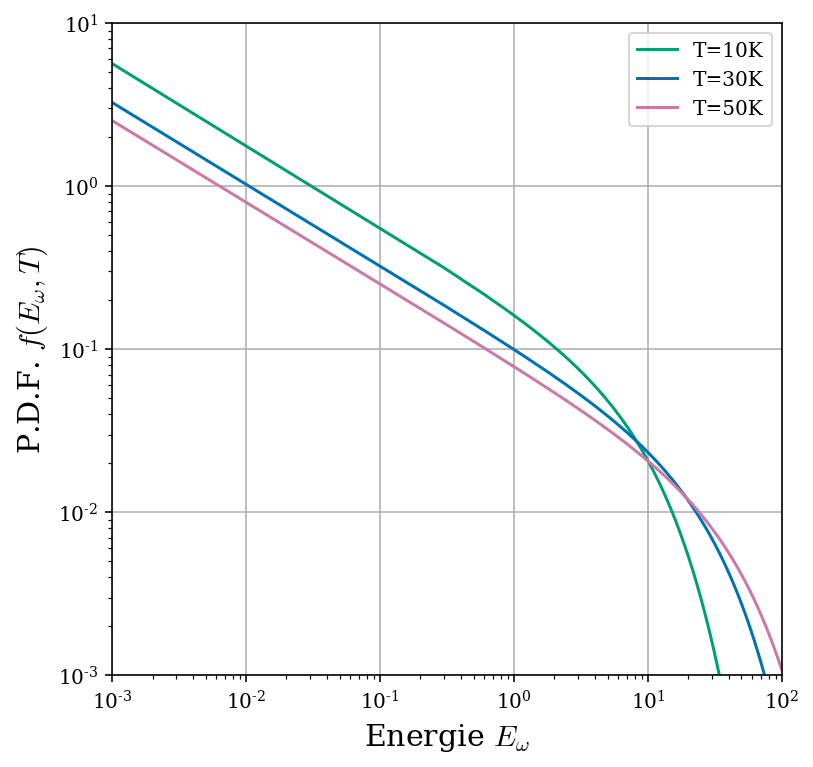

In [198]:
plt.subplots(figsize = (6,6))
E = np.linspace(1e-3, 300, 1000)
t = np.arange(10, 60, 20)
for i in range(len(t)):
    plt.plot(E, fe(E, round(t[i])), label=f'T={round(t[i])}K')   
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlim(1e-3,100)
plt.ylim(1e-3,10)
plt.xlabel('Energie $E_{\omega}$')
plt.ylabel('P.D.F. $f(E_{\omega}, T)$')
plt.grid()

In [137]:
def Normalizer(Temp):
    n_bins=100001
    e=np.linspace(1e-4,150,n_bins)
    f=fe(e, Temp)
    I=0
    for i in range(n_bins-1):
        I += (e[i+1]-e[i])*(f[i+1]+f[i])/2
    return I

Normalizer(T)

0.9999952618082285

In [195]:
t = np.linspace(0, 80, 500)
Norms_scipy = np.empty(len(t), dtype=object)
Norms_hand = np.empty(len(t), dtype=object)

for i in range(len(t)):
    # Norms_hand[i] = Normalizer(t[i])
    Norms_scipy[i] = integrate.quad(lambda eps: fe(eps, t[i]), 0, np.inf, epsrel = 1e-7)[0]

<ipython-input-67-2ab981bcf178>:2: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1/(T*k_B)
<ipython-input-67-2ab981bcf178>:4: RuntimeWarning: invalid value encountered in double_scalars
  return A/np.sqrt(e)*np.exp(-beta*e)
<ipython-input-195-a80efc5607fe>:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Norms_scipy[i] = integrate.quad(lambda eps: fe(eps, t[i]), 0, np.inf, epsrel = 1e-7)[0]


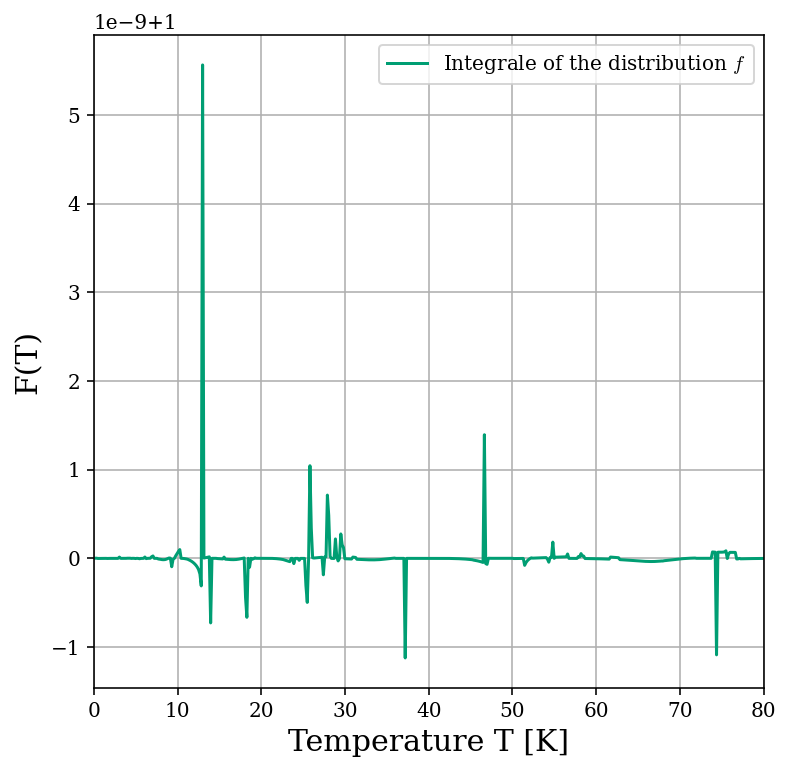

In [197]:
plt.subplots(figsize = (6,6))
plt.plot(t, Norms_scipy, label='Integrale of the distribution $f$')
plt.xlabel("Temperature T [K]")
plt.ylabel("F(T)")
plt.xlim(0, 80)
plt.grid()
plt.legend()

In [58]:
I = integrate.quad(fe, 0, np.inf, args =(T), epsrel = 1e-5)[0]
ExpVal = integrate.quad(exp_val, 0, np.inf, args =(T), epsrel = 1e-5)[0]
varPDF = integrate.quad(moment_2, 0, np.inf, args =(T), epsrel = 1e-5)[0]-ExpVal**2
mean_th = 1/2*k_B*T
corrFac = mean_th/ExpVal
delta   = (k_B*T)/(2*corrFac)
gamma   = (3/(5*corrFac))

print(  " The integral of f:\t" ,  I 
        ,"\n The exp.value: \t" , ExpVal
        , "\n The theoretical :\t", mean_th
        , "\n The variance  :\t", varPDF
        , "\n Mean Th after corr:\t", mean_th/corrFac)

 The integral of f:	 1.0000000000233806 
 The exp.value: 	 15.000000061237072 
 The theoretical :	 15.0 
 The variance  :	 449.9999981587827 
 Mean Th after corr:	 15.000000061237072


b. Now we will build a MC process and verivy that the data set is correct.

In [62]:
def E_generator_plus(ninput, temp=30, nbins = 50):
    xinterval=(1e-3, 150)
    max=fe(1e-3, temp)
    fmax=max+0.02*max

    ii=0

    x_output=np.array([])
    y_output=np.array([])
    x_output_r=np.array([])
    y_output_r=np.array([])

    ii=0

    while ii<ninput:

        x = gen.uniform(*xinterval, ninput)
        y = gen.uniform(0, fmax, ninput)

        x_accepted = x[(y <= fe(x, temp))]
        x_output = (np.append(x_output, x_accepted)).flatten()
        y_accepted = y[(y <= fe(x, temp))]
        y_output = (np.append(y_output, y_accepted)).flatten()

        x_rejected = x[(y > fe(x, temp))]
        y_rejected = y[(y > fe(x, temp))]
        x_output_r = (np.append(x_output_r, x_rejected)).flatten()
        y_output_r = (np.append(y_output_r, y_rejected)).flatten()

        ii+=len(x_accepted)


    x_output = x_output[:ninput]
    y_output = y_output[:ninput]

    return x_output, y_output, x_output_r, y_output_r

def E_generator_AR(ninput, temp=30):
    xinterval=(1e-2, 150)
    max=fe(1e-2, temp)
    fmax=max+0.02*max 

    x_output=np.array([])
    ii=0

    while ii<ninput:

        x = gen.uniform(*xinterval, ninput)
        y = gen.uniform(0, fmax, ninput)
        x_accepted = x[(y <= fe(x, temp))]
        x_output = (np.append(x_output, x_accepted)).flatten()
        ii+=len(x_accepted)
    x_output = x_output[:ninput]

    return x_output

In [63]:
#invert method generation 
def inv_cum(y, T):
    beta = 1/(k_B*T)
    return 1/beta*(erfinv(y))**2

def cum(x, T):
    beta = 1/(k_B*T)
    return erf(np.sqrt(beta*x))

def E_generator(ninput, T):
    r = np.random.uniform(0, 1, ninput)
    x_output = inv_cum(r, T)
    return x_output

c. The theoritical expectation value is a bit lower because the Pdf should be taken from 0 but sinc the pdf is not define in this point building a montecarlo in this range is not possible

In [64]:
DataSet = E_generator(10000000, T)
print(len(DataSet))
Expectation_th = 1/2*k_B*T
Expectation_sim = np.mean(DataSet)
print(Expectation_sim, Expectation_th)

10000000
15.003699480499186 15.0


In [163]:
np.var(DataSet)

449.60472314148404

15.01973532743826

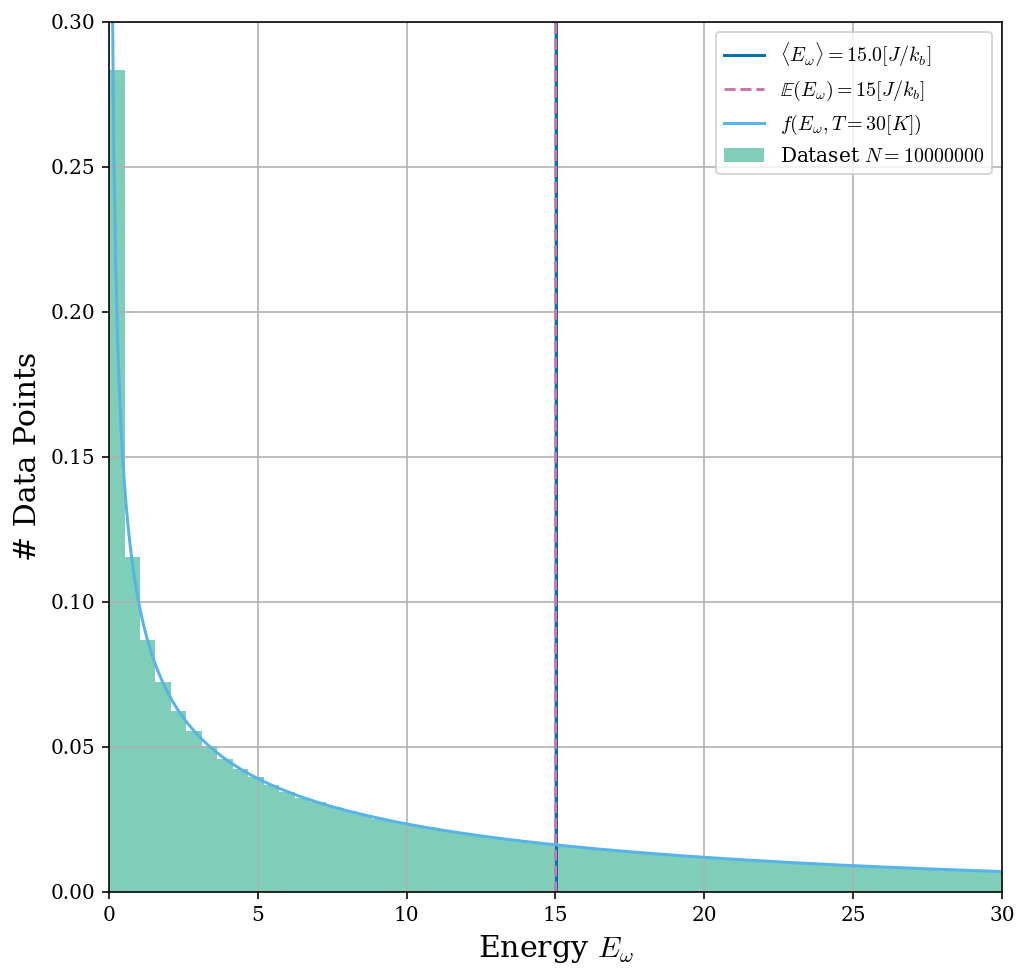

In [194]:
fig, a = plt.subplots(figsize = (8,8))
x = np.linspace(0.1, 30, 500)
f =fe(x, T)
bin_entries, bin_edges, _ = a.hist(DataSet,1000, alpha=0.5, label='Dataset $N =$'+f'${len(DataSet)}$', density=True)
a.plot((Expectation_sim, Expectation_sim), (0, 1), label = r'$\langle E_{\omega}\rangle=$'+f'${round(Expectation_sim, 2)}$'+r'$[K]$')
a.plot((Expectation_th, Expectation_th), (0, 1), label = r'$\mathbb{E}(E_{\omega})=15 [K]$', ls='--')
a.plot(x, f, label='$f(E_{\omega}, T=30[K])$', c=myColors[4])   
a.legend(loc=1)
a.set_xlim(0, 30)
a.set_ylim(0, 0.3)
a.set_xlabel('Energy $E_{\omega}$')
a.grid()
a.set_ylabel('# Data Points')

width = (bin_edges[1] - bin_edges[0])
x = bin_edges[:-1] + width/2
mean_a = np.sum(bin_entries*x) *width

mean_a

Text(0, 0.5, '# Data Points')

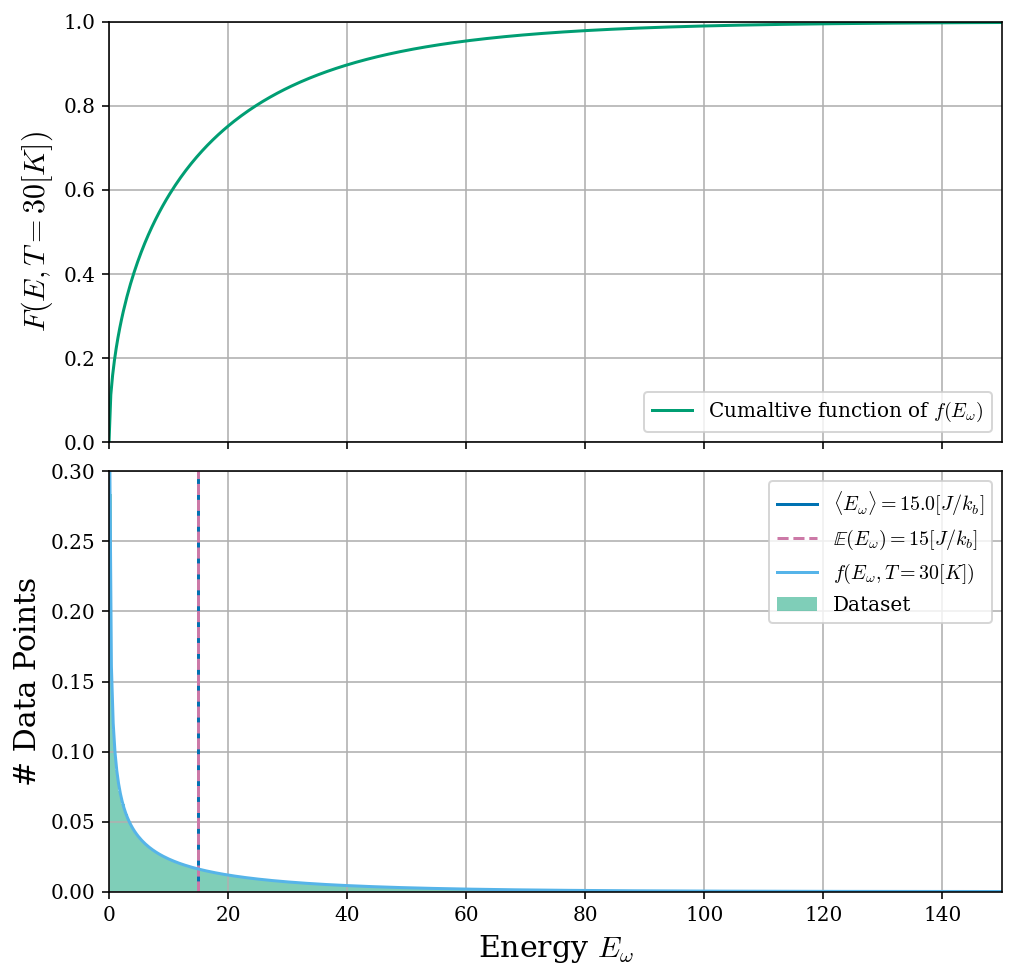

In [193]:
fig, ax = plt.subplots(2, figsize = (8,8), sharex = True)
bin_entries, bin_edges, _ = plt.hist(DataSet,1000, alpha=0.5, label='Dataset', density=True)
x = np.linspace(0.1, 150, 500)
f =fe(x, T)
r = np.linspace(0, 150, 500)
F = cum(r, T)
ax[0].plot(r, F, label='Cumaltive function of $f(E_{\omega})$')
ax[0].set_xlim(0, 150)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('$F(E, T=30[K])$')
plt.subplots_adjust(hspace=0.07)
ax[0].legend(loc=4)

ax[0].grid()
ax[1].grid()

ax[1].plot((Expectation_sim, Expectation_sim), (0, 1), label = r'$\langle E_{\omega}\rangle=$'+f'${round(Expectation_sim, 2)}$'+r'$[K]$')
ax[1].plot((Expectation_th, Expectation_th), (0, 1), label = r'$\mathbb{E}(E_{\omega})=15 [K]$', ls='--')
ax[1].plot(x, f, label='$f(E_{\omega}, T=30[K])$', c=myColors[4])   
ax[1].legend(loc=1)
ax[1].set_xlim(0, 150)
ax[1].set_ylim(0, 0.3)
ax[1].set_xlabel('Energy $E_{\omega}$')
ax[1].set_ylabel('# Data Points')

In [161]:
datas = E_generator_plus(500, 30)
x = np.linspace(0.1, 150, 1000)
f =fe(x, T)
fmax =fe(1e-3, T)
max = fmax+0.02*fmax

datas_1 = E_generator_AR(100000, 30)
mean_1 = np.mean(datas_1)


N_rejected = 250000  for N_accepted = 500 
 Efficiency =  0.001996007984031936


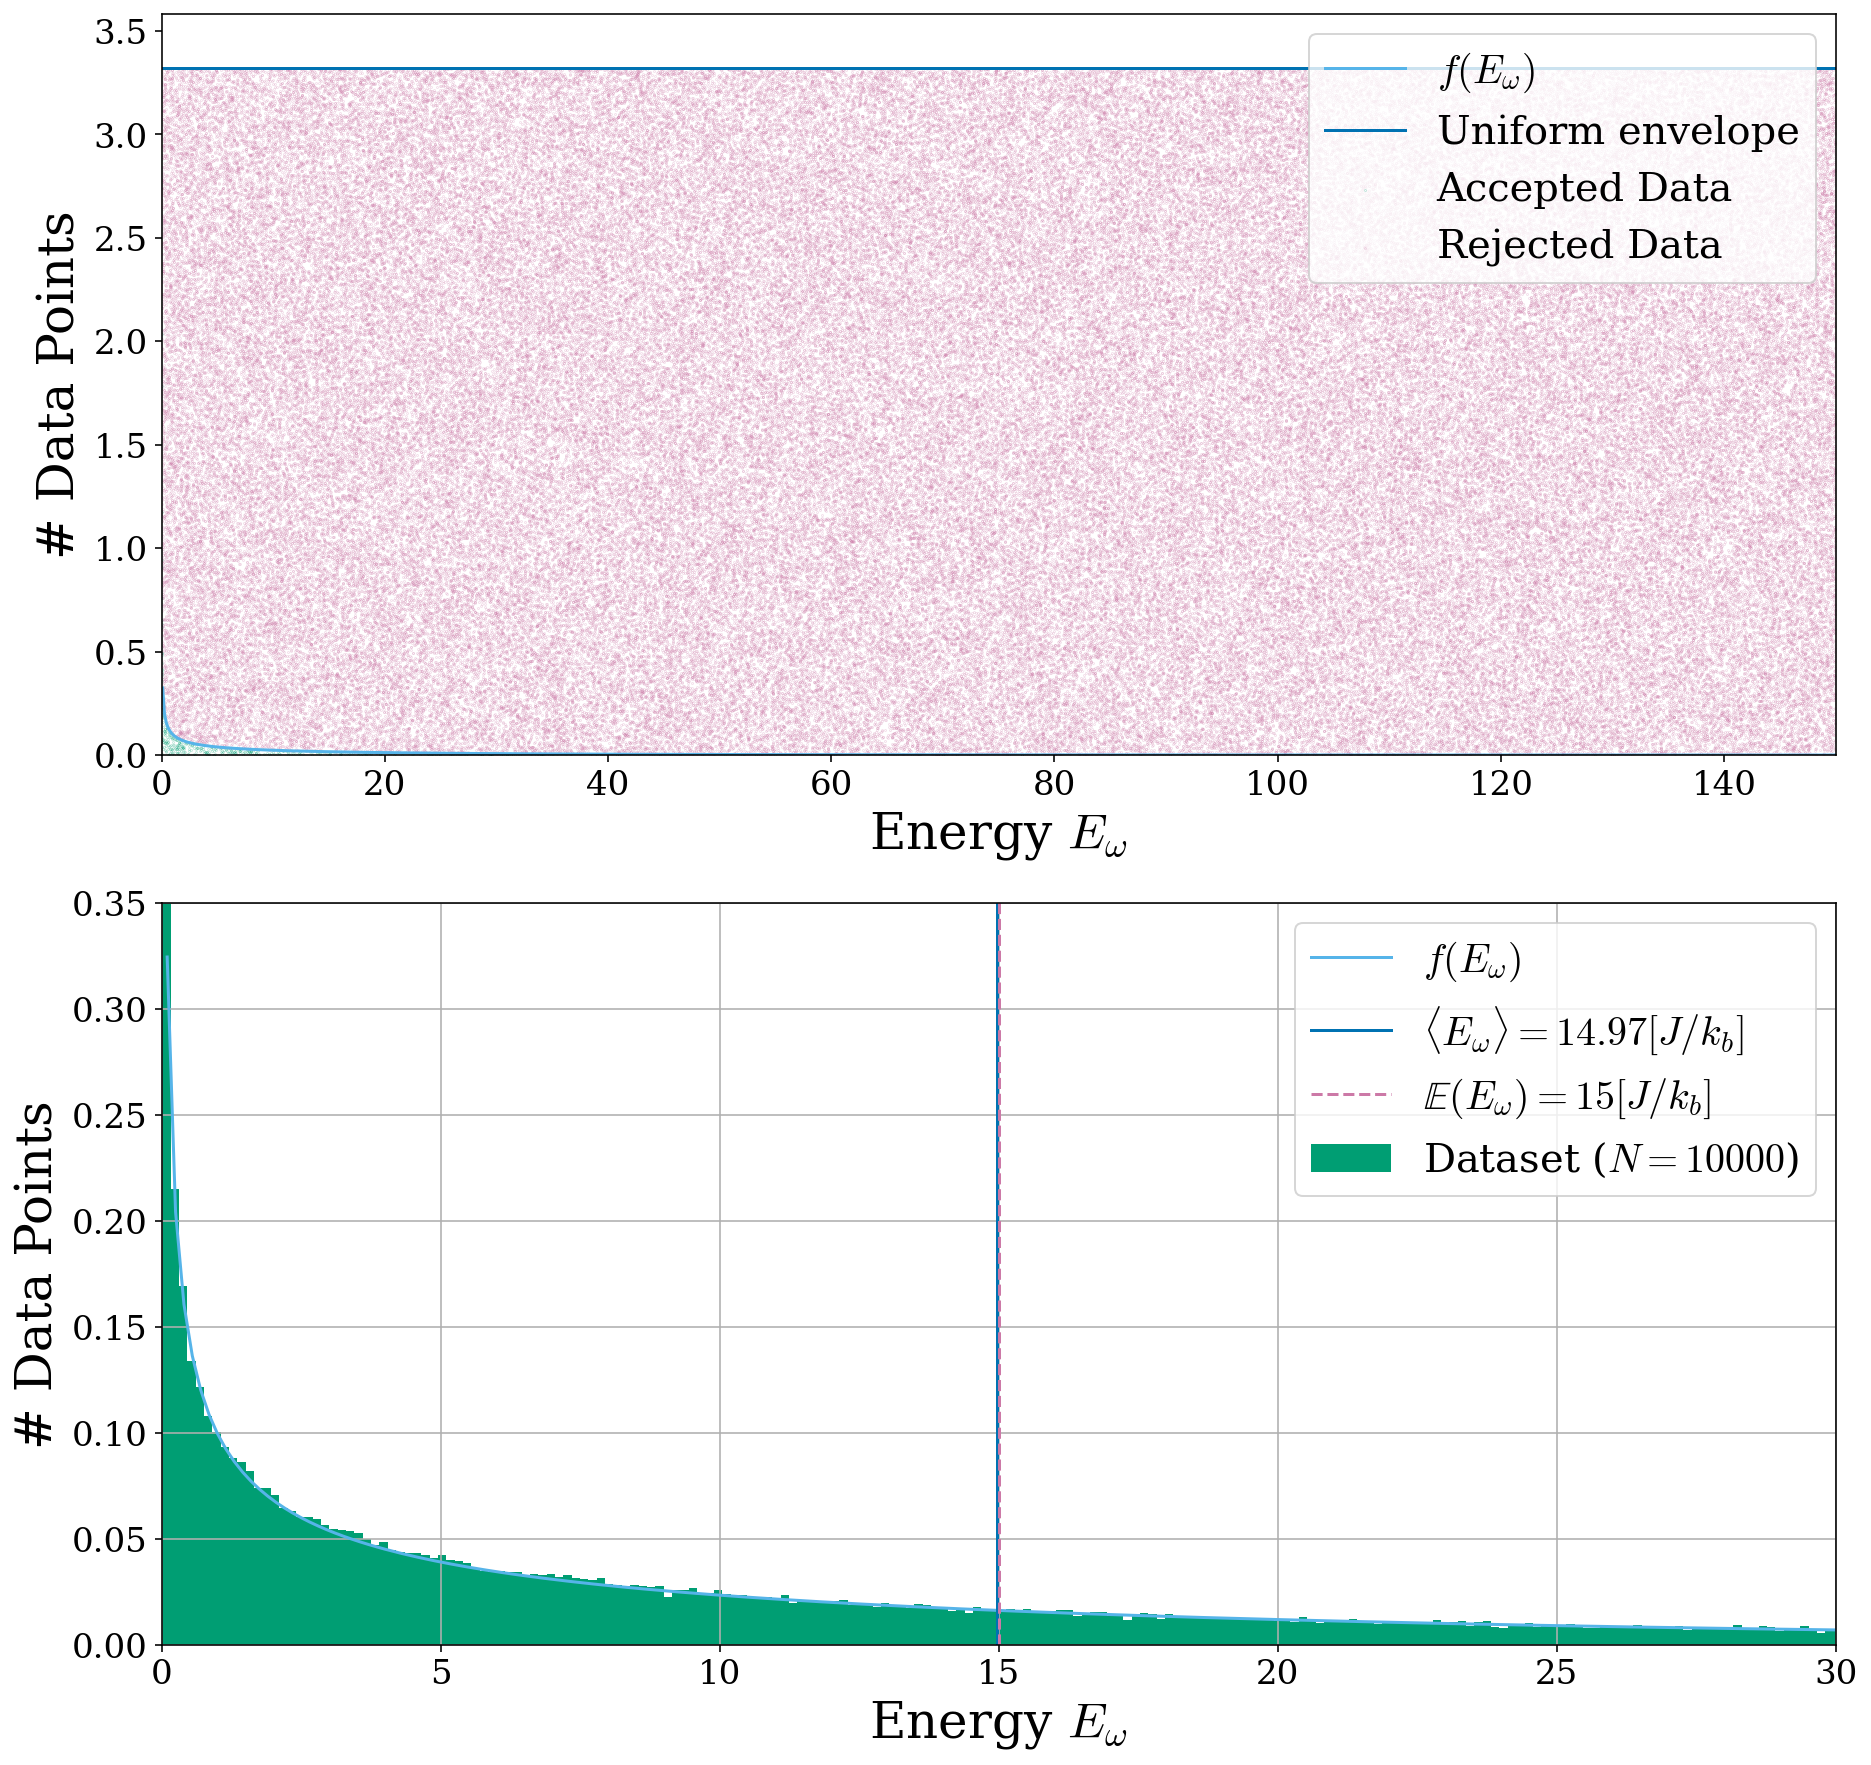

In [192]:
fig, bx = plt.subplots(2, figsize = (15,15))

bx[0].plot(x, f, label='$f(E_{\omega})$', c=myColors[4])   
bx[0].plot((0, 150), (max, max), label = 'Uniform envelope', c=myColors[1])
bx[0].scatter(datas[0], datas[1], s=0.01, label='Accepted Data', color= myColors[0])
bx[0].scatter(datas[2], datas[3], s=0.01, label='Rejected Data', color= myColors[2])
bx[0].set_xlabel('Energy $E_{\omega}$', fontsize = 25)
bx[0].set_ylabel('# Data Points', fontsize = 25)
bx[0].set_xlim(0, 150)
bx[0].set_ylim(0, fmax+0.1*fmax)
bx[0].legend(loc=1, fontsize = 20)
bx[0].xaxis.set_tick_params(labelsize=17)
bx[0].yaxis.set_tick_params(labelsize=17)

plt.subplots_adjust(hspace=0.2)
plt.grid()
bx[1].plot(x, f, label='$f(E_{\omega})$', c=myColors[4])   
bx[1].hist(datas_1, bins =1000, density=True, label='Dataset ($N=10000$)')
bx[1].set_xlabel('Energy $E_{\omega}$', fontsize = 25)
bx[1].set_ylabel('# Data Points', fontsize =25)
bx[1].set_xlim(0, 30)
bx[1].set_ylim(0,0.35)
bx[1].plot((mean_1, mean_1), (0, 1), label = r'$\langle E_{\omega}\rangle=$'+f'${round(mean_1, 2)}$'+r'$[K]$')
bx[1].plot((Expectation_th, Expectation_th), (0, 1), label = r'$\mathbb{E}(E_{\omega})=15 [K]$', ls='--')
bx[1].legend(loc=1, fontsize = 20)
bx[1].xaxis.set_tick_params(labelsize=17)
bx[1].yaxis.set_tick_params(labelsize=17)

print('N_rejected =',len(datas[2]), ' for N_accepted =',len(datas[0]), '\n Efficiency = ', len(datas[0])/(len(datas[2])+len(datas[0])))

In [164]:
from scipy.stats import skew
from scipy.stats import kurtosis

s = skew(DataSet)
k = kurtosis(DataSet)
print(s, k)

2.8244245454164547 11.99302020340857


Task-2 
a. Law of large number

In [166]:
DataSet_LLN = DataSet

In [171]:
N=len(DataSet_LLN)
list_ntest = np.around(np.logspace(0, int(np.log10(N)), 500))
list_Average = np.empty(len(list_ntest), dtype=object)
l = len(list_ntest)
for i in range(l):
    moy = np.mean(DataSet_LLN[:int(list_ntest[i])])
    list_Average[i] = moy

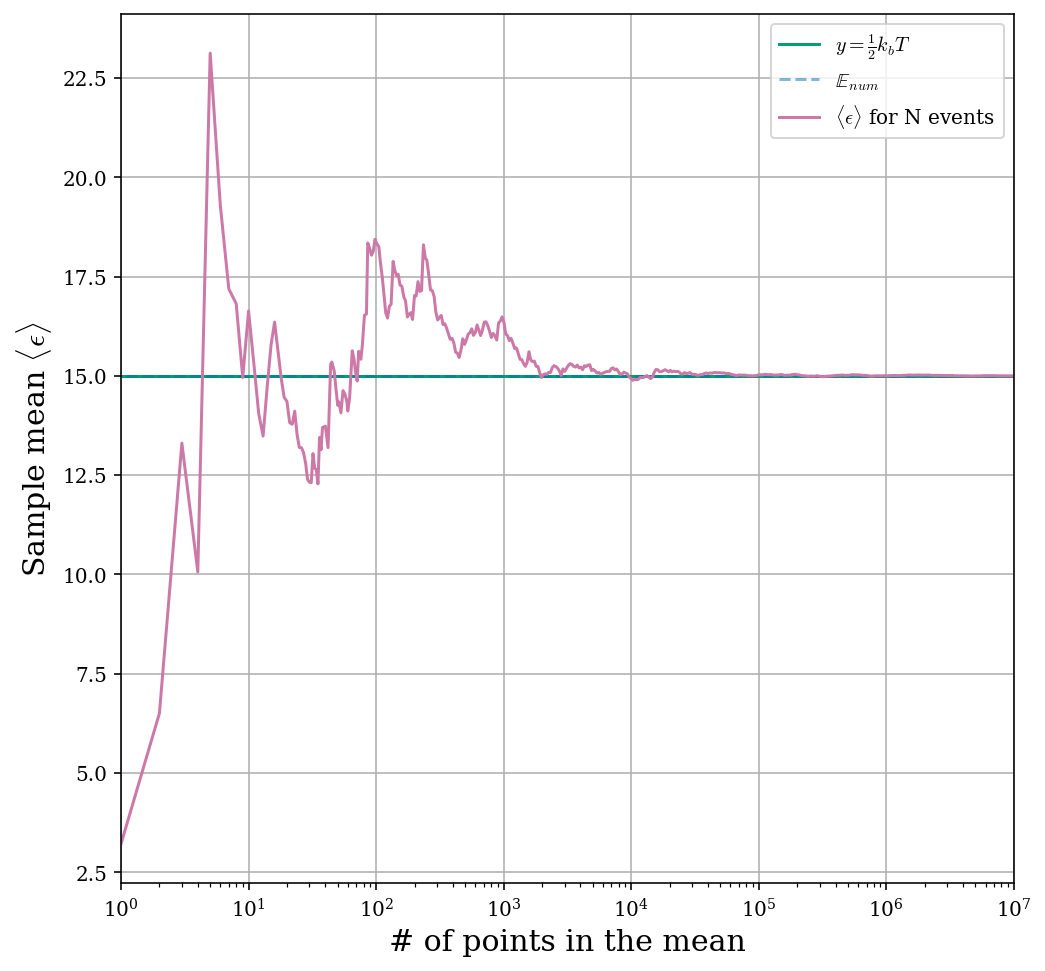

In [173]:
N=int(list_ntest[-1])
plt.subplots(figsize = (8,8))
plt.plot([0,N],[1/2*T,1/2*T],  label = r"$y = \frac{1}{2}T$")
plt.plot([0,N],[Expectation_sim,Expectation_sim], label = r"$\mathbb{E}_{num}$", ls='--', alpha = 0.5)
plt.plot(list_ntest, list_Average, label = r"$\langle\epsilon\rangle $ for N events ")

plt.xlabel("# of points in the mean")
plt.ylabel(r"Sample mean $\langle\epsilon\rangle$")
plt.legend()
plt.xlim(1, 10000000)
plt.grid()
plt.xscale('log')

b. We want to compute the variance of $x = \sqrt{2E_{\omega}/m\omega^2}$ 

In [201]:
np.mean(np.sqrt(2*DataSet/(m)))*kb.value**(1/2)


2.568155519966769e-12

c. Central limit theorem

In [534]:
n_exp = [10000,300]
n_sample = 10000

means_E_CLT = np.empty(len(n_exp), dtype=object)
vars_E_CLT = np.empty(len(n_exp), dtype=object)


for i in range(len(n_exp)):
    mean_CLT = np.empty(n_exp[i], dtype=object)
    var_CLT = np.empty(n_exp[i], dtype=object)
    n=0
    while n<n_exp[i]:
        CLT_dataset = E_generator(n_sample, T)
        mean_CLT[n] = np.mean(CLT_dataset)
        var_CLT[n] = np.var(CLT_dataset)
        n+=1
    
    means_E_CLT[i] = mean_CLT
    vars_E_CLT[i] = var_CLT

The mean and the variance of the mean, for Nexp = 10000 , are  14.996724161054043 0.044999999815878274
The mean and the variance of the mean, for Nexp = 300 , are  14.987428874188709 0.044999999815878274


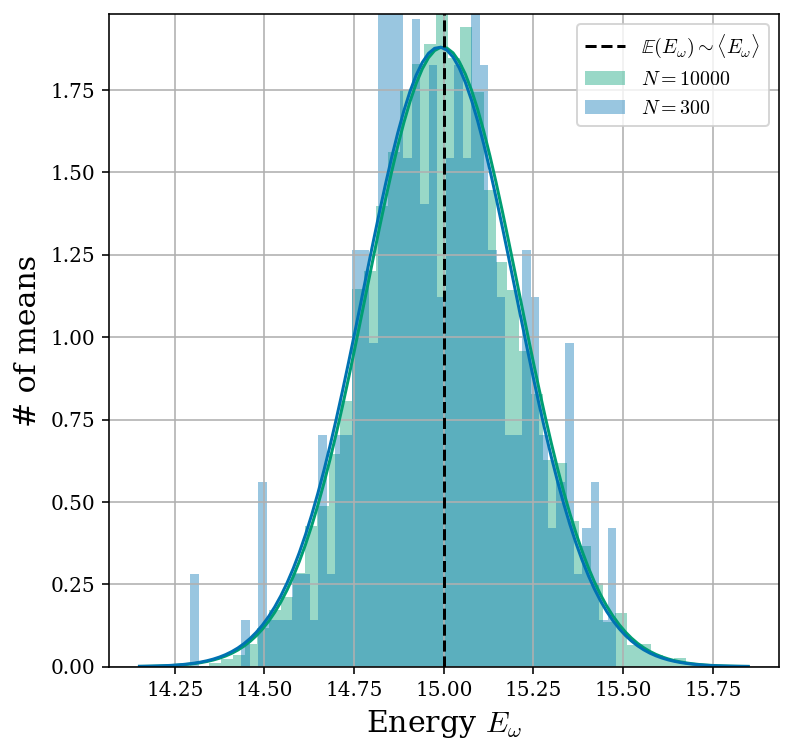

In [535]:
Fig, bx = plt.subplots(figsize=(6,6))


Means_CLT = np.empty(len(n_exp), dtype=object)
sigma_CLT = np.empty(len(n_exp), dtype=object)
plot_max = 0
for i in range(len(n_exp)):
    Means_CLT[i] = np.mean(means_E_CLT[i])
    sigma_CLT[i] = np.sqrt(varPDF/(n_sample))
    efit = np.linspace(ExpVal-4*sigma_CLT[i], ExpVal+4*sigma_CLT[i], 100)
    G = Gaussian(efit, Means_CLT[i], sigma_CLT[i])
    bx.plot(efit, G)
    bx.hist(means_E_CLT[i], alpha = 0.4, density = True, bins=50, color = myColors[i], label = f'$N={n_exp[i]}$')
    print('The mean and the variance of the mean, for Nexp =', n_exp[i],', are ', Means_CLT[i], (sigma_CLT[i])**2)

    if np.max(G)>plot_max:
        plot_max = np.max(G)
        bx.set_ylim(0, plot_max+0.1)
        sig_plot = sigma_CLT[i]
    

bx.plot([mean_th, mean_th], [0, 10], 'k--', label= r'$\mathbb{E}(E_{\omega})\sim\langle E_{\omega} \rangle$')

bx.set_xlabel('Energy $E_{\omega}$')
bx.set_ylabel('# of means')
bx.legend()
bx.grid()

In [531]:
n_exp = 10000
n_sample = [20000, 50000]

means_E_CLT = np.empty(len(n_sample), dtype=object)
vars_E_CLT = np.empty(len(n_sample), dtype=object)


for i in range(len(n_sample)):
    mean_CLT = np.empty(n_exp, dtype=object)
    var_CLT = np.empty(n_exp, dtype=object)
    n=0
    while n<n_exp:
        CLT_dataset = E_generator(n_sample[i], T)
        mean_CLT[n] = np.mean(CLT_dataset)
        var_CLT[n] = np.var(CLT_dataset)
        n+=1
    
    means_E_CLT[i] = mean_CLT
    vars_E_CLT[i] = var_CLT

The mean and the variance of the mean, for N = 20000 , are  15.000888875263048 0.02249999990793914
The mean and the variance of the mean, for N = 50000 , are  14.999840472332865 0.008999999963175655


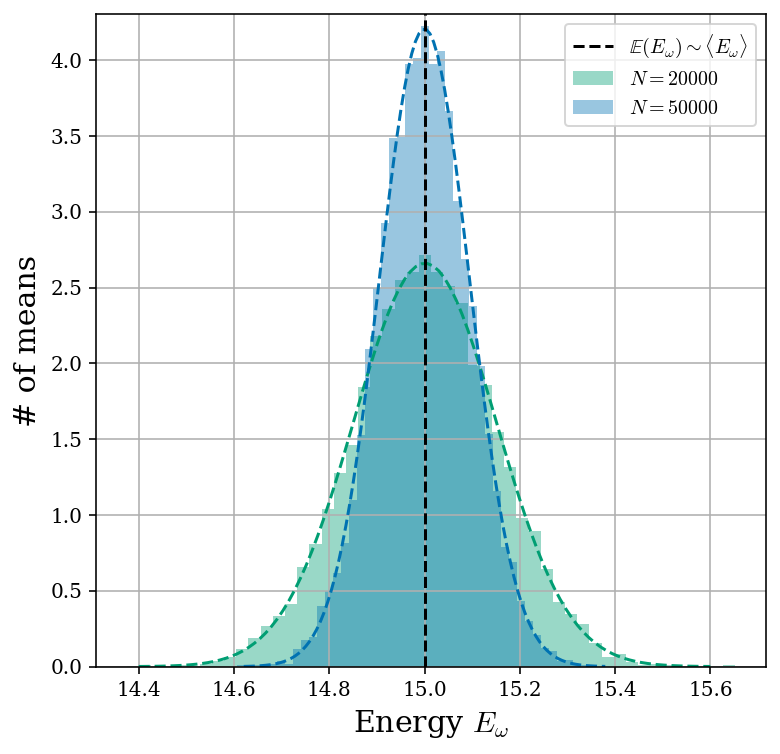

In [532]:
Fig, bx = plt.subplots(figsize=(6,6))


Means_CLT = np.empty(len(n_sample), dtype=object)
sigma_CLT = np.empty(len(n_sample), dtype=object)
plot_max = 0
for i in range(len(n_sample)):
    Means_CLT[i] = np.mean(means_E_CLT[i])
    sigma_CLT[i] = np.sqrt(varPDF/(n_sample[i]))
    efit = np.linspace(ExpVal-4*sigma_CLT[i], ExpVal+4*sigma_CLT[i], 100)
    G = Gaussian(efit, Means_CLT[i], sigma_CLT[i])
    bx.plot(efit, G, ls='--')
    bx.hist(means_E_CLT[i], alpha = 0.4, density = True, bins=50, color = myColors[i], label = f'$N={n_sample[i]}$')
    print('The mean and the variance of the mean, for N =', n_sample[i],', are ', Means_CLT[i], (sigma_CLT[i])**2)

    if np.max(G)>plot_max:
        plot_max = np.max(G)
        bx.set_ylim(0, plot_max+0.1)
        sig_plot = sigma_CLT[i]
    

bx.plot([mean_th, mean_th], [0, 10], 'k--', label= r'$\mathbb{E}(E_{\omega})\sim\langle E_{\omega} \rangle$')

bx.set_xlabel('Energy $E_{\omega}$')
bx.set_ylabel('# of means')
bx.legend()
bx.grid()

Task - 3
a. 

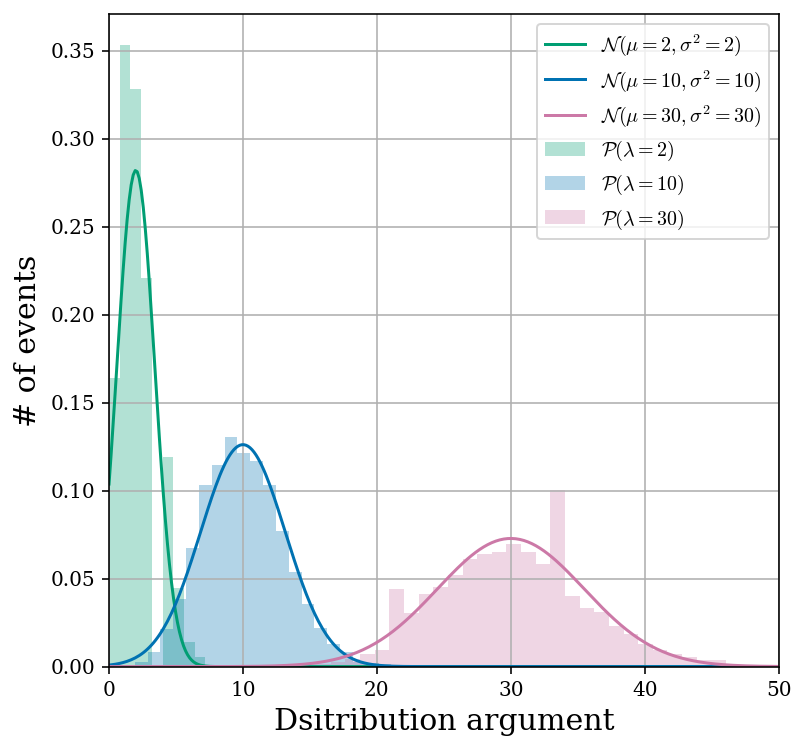

In [561]:
plt.subplots(figsize=(6,6))
x = np.linspace(0,60, 400)
plt.hist(np.random.poisson(2,10000) ,alpha = 0.3, color = myColors[0] , bins = 10  , density= True, label = "$\mathcal{P}(\lambda=2)$")
plt.hist(np.random.poisson(10,10000) ,alpha = 0.3, color = myColors[1] , bins = 24  , density= True, label = "$\mathcal{P}(\lambda=10)$")
plt.hist(np.random.poisson(30,10000),alpha = 0.3, color = myColors[2] , bins = 43  , density= True, label = "$\mathcal{P}(\lambda=30)$")
plt.plot(x ,Gaussian(x, 2, np.sqrt(2)), label = "$\mathcal{N}(\mu =2, \sigma^2 = 2)$")
plt.plot(x ,Gaussian(x, 10, np.sqrt(10)), label = "$\mathcal{N}(\mu=10, \sigma^2 = 10)$")
plt.plot(x ,Gaussian(x, 30, np.sqrt(30)), label = "$\mathcal{N}(\mu=30, \sigma^2 = 30) $")
plt.legend()
plt.xlim(0,50)
plt.xlabel("Dsitribution argument")
plt.ylabel("# of events")
plt.grid()

b. First we can create a function that return the expted value for each bins, which will be used in to calculate the $\chi^2$ distribution: $\chi^2=\frac{(\#entries-expactation~value)^2}{expactation~value}$, for each bins.

In [327]:
def bins_expectation(bin_edges, T):
    E = np.empty(len(bin_edges)-1, dtype=object)
    for i in range(len(bin_edges)-1):
        E[i] = integrate.quad(fe, bin_edges[i], bin_edges[i+1], args = (T))[0]
    return E

def chi_squared(Data, nbins, T):
    Data = np.array(Data)
    Data = Data[150>Data]

    n_sample = len(Data)
    
    bin_entries, bin_edges = np.histogram(Data, bins=nbins, density=False)
    f_scaled = n_sample*bins_expectation(bin_edges, T)

    x2 = 0
    for i in range(len(bin_entries)):
        x2 += (bin_entries[i]-f_scaled[i])**2/(f_scaled[i])
        
    return x2

In [338]:
n_exp=3000
n_sample=3000

chis = np.empty(n_exp, dtype=object)
n_bins=15

for ii in range(n_exp):
    x2_DataSet = np.array(E_generator(n_sample, T))
    x2_DataSet = x2_DataSet[150>x2_DataSet]
    chis[ii] = chi_squared(x2_DataSet, n_bins, T)

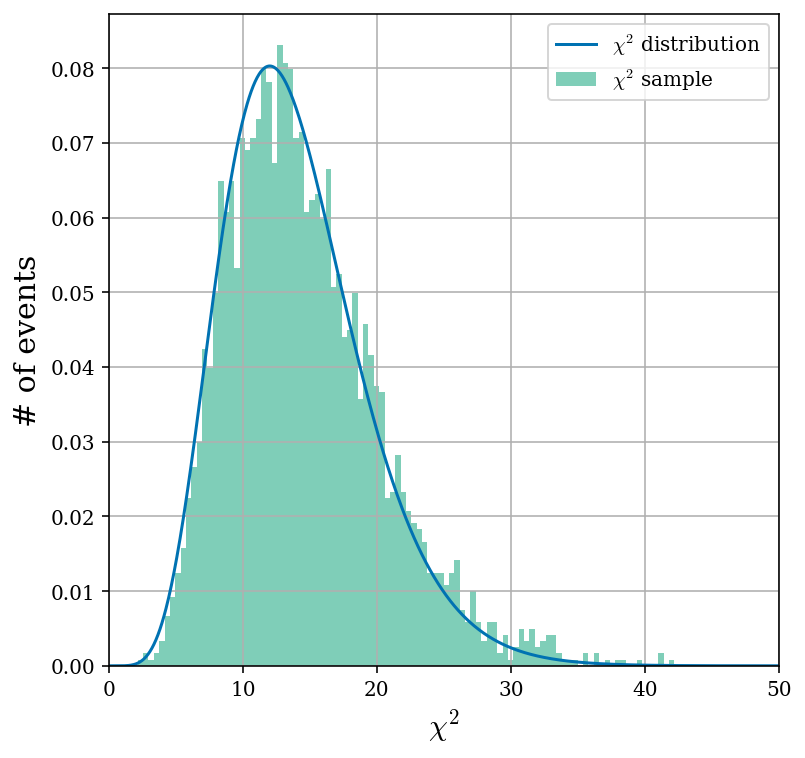

In [340]:
x_fit = np.linspace(0, 50, 1000)
Chi2 = stats.chi2.pdf(x_fit, df = n_bins-1)

plt.subplots(figsize=(6,6))
plt.hist(chis, density=True, bins=100, alpha=0.5, label = '$\chi^2$ sample')
plt.plot(x_fit, Chi2, label='$\chi^2$ distribution')
plt.xlabel('$\chi^2$')
plt.ylabel('# of events')
plt.xlim(0, 50)
plt.grid()
plt.legend()



c.

<ipython-input-327-4bc59fbe64ee>:4: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  E[i] = integrate.quad(fe, bin_edges[i], bin_edges[i+1], args = (T))[0]


(0.0, 80.0)

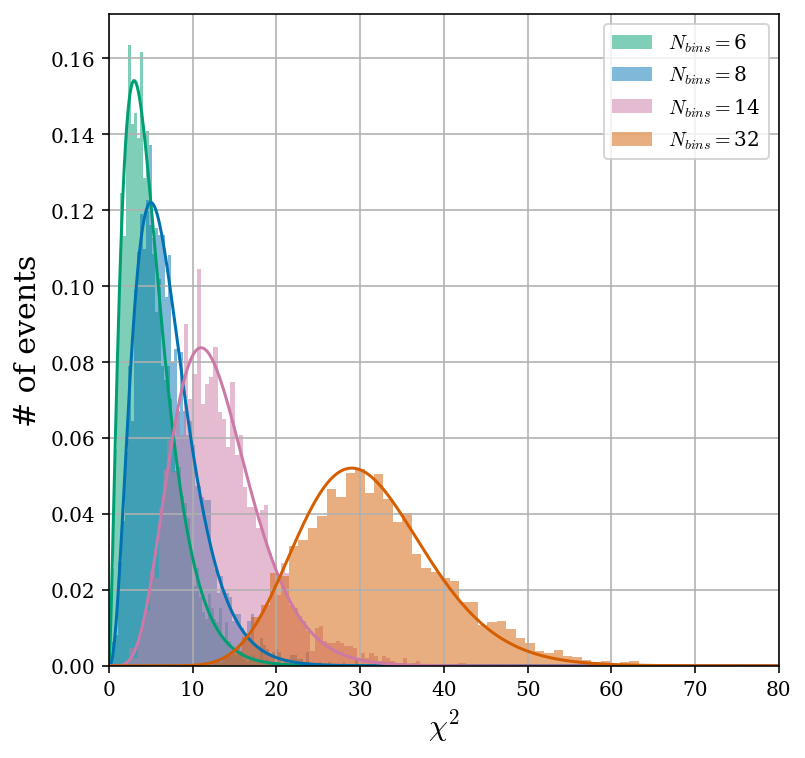

In [349]:
n_exp=3000
n_sample=3000

x_fit = np.linspace(0, 140, 1000)
plt.subplots(figsize=(6,6))
for i in range(4):
    chis = np.empty(n_exp, dtype=object)
    for ii in range(n_exp):
        n_bins=5+3**i
        x2s_DataSet = np.array(E_generator(n_sample, T))
        x2s_DataSet = x2s_DataSet[x2s_DataSet<150]
        chis[ii] = chi_squared(x2s_DataSet, n_bins, T)
        

    Chi2 = stats.chi2.pdf(x_fit, df = n_bins-1, scale = 1)

    plt.hist(chis, density=True, bins=80, alpha=0.5, label = '$N_{bins}=$'+f'{n_bins}', color=myColors[i])
    plt.plot(x_fit, Chi2, color=myColors[i])

plt.xlabel('$\chi^2$')
plt.ylabel('# of events')
plt.legend()
plt.grid()
plt.xlim(0, 80)


Task - 4
a.

In [242]:
def LLH(etest,temp=T):
    return -np.log(fe(etest,temp)).sum()

In [481]:
def Likelihoodlizer(DataSet, T_estimate):
    nL = len(T_estimate)
    L = np.empty(nL, dtype=object)
    l = np.empty(nL, dtype=object)
    for i in range(0,nL):
        L[i]=LLH(DataSet, T_estimate[i])

    imin=np.argmin(L)
    Lmin=L[imin]

    for i in range(0,nL):
        l[i]=L[i]-Lmin

    i1=0
    i2=0
    for i in range(0,nL-1):
        if l[i]>0.5 and l[i+1]<0.5:
            i1=i
        if l[i]<0.5 and l[i+1]>0.5:
            i2=i

    return T_estimate[imin],(T_estimate[i2]-T_estimate[i1])/2

def Likelihoodlizer_plot(DataSet, T_estimate):
    nL = len(T_estimate)
    L = np.empty(nL, dtype=object)
    l = np.empty(nL, dtype=object)
    for i in range(0,nL):
        L[i]=LLH(DataSet, T_estimate[i])

    imin=np.argmin(L)
    Lmin=L[imin]

    for i in range(0,nL):
        l[i]=L[i]-Lmin

    i1=0
    i2=0
    for i in range(0,nL-1):
        if l[i]>0.5 and l[i+1]<0.5:
            i1=i
        if l[i]<0.5 and l[i+1]>0.5:
            i2=i

    return T_estimate[imin],(T_estimate[i2]-T_estimate[i1])/2, l

In [540]:
DataSet_L = E_generator(50000, T)
T_estimate = np.linspace(28,32,201)

T_e, err, l = Likelihoodlizer_plot(DataSet_L, T_estimate)
print ('T=',T_e,'+-', err, 'K')

T= 30.16 +- 0.1999999999999993 K


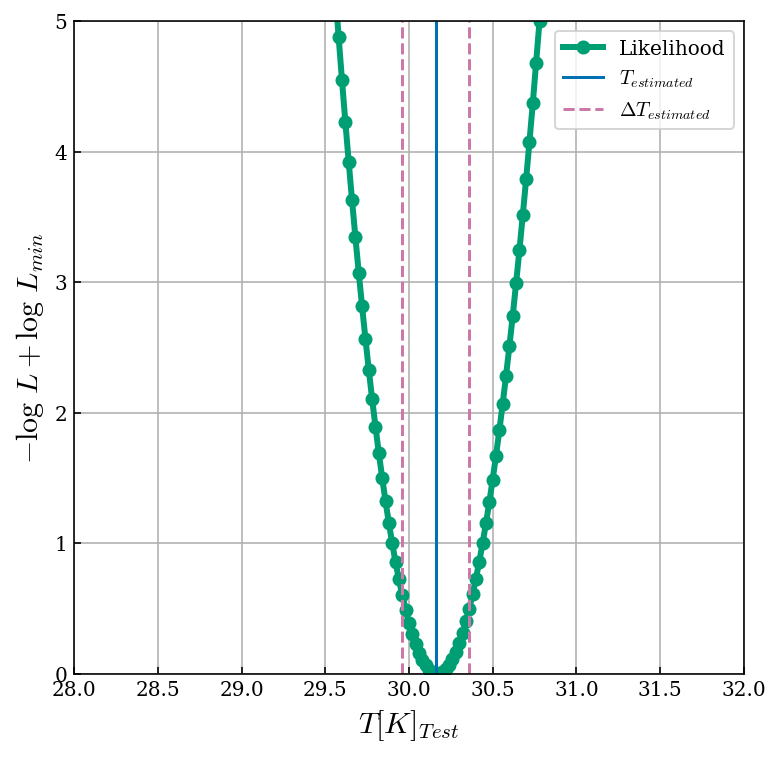

In [541]:
plt.subplots(figsize=(6,6))
plt.plot(T_estimate,l,'-',lw=3, marker='o', label='Likelihood')
plt.plot((T_e, T_e), (0,12), label='$T_{estimated}$')
plt.plot((T_e+err, T_e+err), (0,12), color = myColors[2], linestyle='--')
plt.plot((T_e-err, T_e-err), (0,12), label='$\Delta T_{estimated}$', linestyle='--', color = myColors[2])

plt.xlabel(r'$T[K]_{Test}$')
plt.ylabel(r'$-\log{\ L}+\log{\ L_{min}}$')
plt.xlim(28, 32)
plt.ylim(0,5.0)
plt.tick_params(direction='in')
plt.legend()
plt.grid(True)
plt.show()
    

In [511]:
n_exp = 10000
T_estimate = np.linspace(29,31,50)
N = [20000, 50000]

L_T_es = np.empty(len(N), dtype = object)
L_errs = np.empty(len(N), dtype = object)

for n in range(len(N)):
    T_e_llh = np.empty(n_exp, dtype = object)
    err_llh = np.empty(n_exp, dtype = object)
    for i in range(n_exp):
        LLH_datas = E_generator(N[n], T)
        T_e_llh[i], err_llh[i] = Likelihoodlizer(LLH_datas, T_estimate)
    L_T_es[n] = T_e_llh
    L_errs[n] = err_llh


sigma_ 20000  = 0.09701293329707544
T_ 20000  = 29.9962332495679 +- 0.31146899251301957
sigma_ 50000  = 0.036770988843282296
T_ 50000  = 29.998363295918455 +- 0.191757630469513


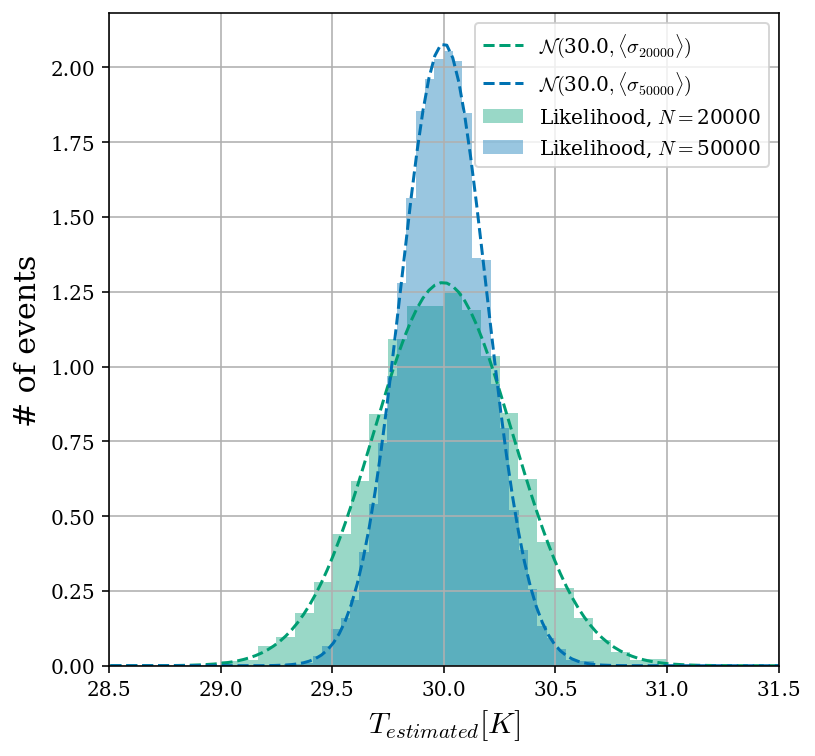

In [550]:
import scipy.optimize as spo
N = [20000, 50000]
x = np.linspace(26,34,300)
plt.subplots(figsize=(6,6))
nbins = [24, 35] 
fit_name=[r"$\mathcal{N}($"f"{round(np.mean(L_T_es[0]),1)}"r"$,\langle\sigma_{20000}\rangle)$", r"$\mathcal{N}($"f"{round(np.mean(L_T_es[1]),1)}"r"$,\langle\sigma_{50000}\rangle)$"]
for i in range(len(N)):
    bin_entries, bin_edges, _ = plt.hist(L_T_es[i], bins = nbins[i], density=True, alpha = 0.4, label='Likelihood, $N=$'+f'{N[i]}', color = myColors[i])
    bin_centers = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])
    
    popt, pcov = spo.curve_fit(Gaussian, bin_centers, bin_entries,bounds=([29.5, 0.1], [30.5, 1]))
    binfit=Gaussian(bin_centers, *popt)
    
    y = Gaussian(x,*popt)

    plt.plot(x,y, "--", label =  fit_name[i], color = myColors[i])
    print('sigma_',N[i] ,' =', popt[1]**2)
    print('T_',N[i],' =', popt[0], '+-',  popt[1])

plt.xlim(28.5, 31.5)
plt.xlabel("$T_{estimated}[K]$")
plt.ylabel("# of events")
plt.legend()
plt.grid()


b. LeastSquare

In [580]:
def LeastSquare(Data, nBins, Ts):

    Data = np.array(Data)
    Data = Data[150>Data]

    n_sample = len(Data)

    bin_entries, bin_edges = np.histogram(Data, bins = nBins, density=False)
    
    listx2 =  []

    for j in range(len(Ts)):
        x2=0
        fj = n_sample*bins_expectation(bin_edges,Ts[j])
        for i in range(len(bin_entries)):
            if(bin_entries[i]==0):
                dif=0
            else:
                dif = (bin_entries[i]-fj[i])**2/bin_entries[i]
                x2+=dif
        listx2.append(x2)
    return listx2

    
def Goodness(Data, nbins, T):
    Data = np.array(Data)
    Data = Data[150>Data]

    n_sample = len(Data)

    bin_entries, bin_edges = np.histogram(Data, bins = nbins, density=False)

    fi = n_sample*bins_expectation(bin_edges,T)
    si = np.sqrt(bin_entries)

    x2 = 0

    for i in range(len(bin_entries)):
        if(bin_entries[i]==0):
            dif=0
        else:
            dif = np.power((bin_entries[i]-fi[i])/(si[i]),2)
            x2+=dif
    return x2

In [574]:
N = [100, 5000, 10000]
nbins  =[10, 30]

T_estimate = np.linspace(10,50,200)

DS = []
LSs = []


for i in range(len(nbins)):
    for ii in range(len(N)):
        ds = E_generator(N[ii], T)
        DS.append(ds)
        ls = np.empty(len(T_estimate), dtype =object)
        for iii in range(len(T_estimate)):
            ls[iii] = Goodness(ds, nbins[i], T_estimate[iii])
        LSs.append(ls)
    

<ipython-input-327-4bc59fbe64ee>:4: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  E[i] = integrate.quad(fe, bin_edges[i], bin_edges[i+1], args = (T))[0]


[]

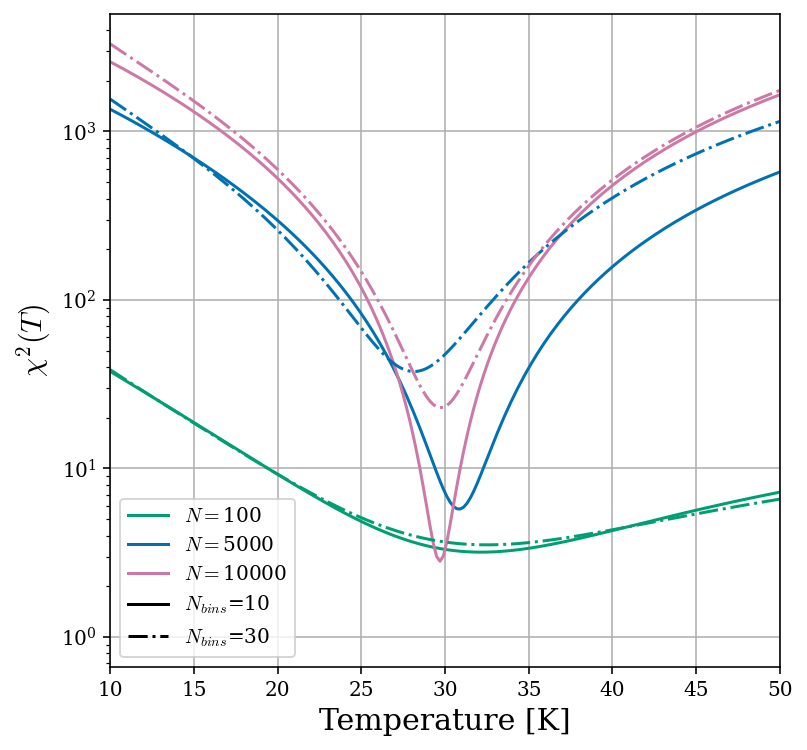

In [575]:
fig, cx = plt.subplots(figsize=(6,6))

cx.plot(T_estimate, LSs[0], label='$N=$'+f'{N[0]}')
cx.plot(T_estimate, LSs[1], label='$N=$'+f'{N[1]}')
cx.plot(T_estimate, LSs[2], label='$N=$'+f'{N[2]}')
cx.plot(T_estimate, LSs[3], ls = '-.', c = myColors[0])
cx.plot(T_estimate, LSs[4], ls = '-.', c = myColors[1])
cx.plot(T_estimate, LSs[5], ls = '-.', c = myColors[2])

cx.plot((0.5, 0.5),(1,1), '-k', label = '$N_{bins}$='+f'{nbins[0]}')
cx.plot((0.5, 0.5),(1,1), '-.k', label = '$N_{bins}$='+f'{nbins[1]}')

cx.set_xlabel('Temperature [K]')
cx.set_ylabel('$\chi^2(T)$')
cx.set_xlim(10, 50)
# cx.set_ylim(2, 1000)
cx.legend()
cx.grid()
cx.semilogy()

In [581]:
def Chi2lizer(DataSet, T_estimate, nbins):
    x2s = LeastSquare(DataSet, nbins, T_estimate)
    imin = np.argmin(x2s)
    x2Min = x2s[imin]
    T_e = T_estimate[imin]

    for i in range(len(x2s)):
        x2s[i] = x2s[i]-x2Min

    i1=0
    i2=0
    for i in range(len(T_estimate)-1):
        if x2s[i]>1 and x2s[i+1]<1:
            i1=i
        if x2s[i]<1 and x2s[i+1]>1:
            i2=i

    err = (T_estimate[i2]-T_estimate[i1])/2
    return T_e, err, x2s

In [584]:
T_estimate = np.linspace(28,32,301)
nbins= 30
DataSet_x2_0 = E_generator(100000, T)
T_e, err, x2s = Chi2lizer(DataSet_x2_0, T_estimate, nbins)


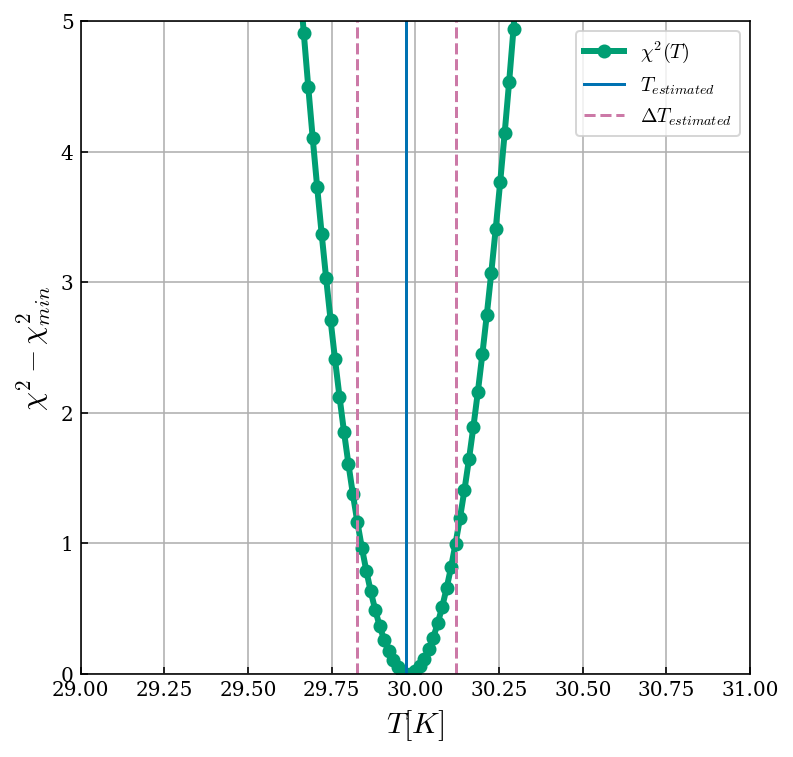

In [585]:
plt.subplots(figsize=(6,6))
plt.plot(T_estimate,x2s,'-',lw=3, marker='o', label='$\chi^2(T)$')
plt.plot((T_e, T_e), (0,12), label='$T_{estimated}$')
plt.plot((T_e+err, T_e+err), (0,12), color = myColors[2], linestyle='--')
plt.plot((T_e-err, T_e-err), (0,12), label='$\Delta T_{estimated}$', linestyle='--', color = myColors[2])

plt.xlabel(r'$T[K]$')
plt.ylabel(r'$\chi^2-\chi^2_{min}$')
plt.xlim(29, 31)
plt.ylim(0,5.0)
plt.tick_params(direction='in')
plt.legend()
plt.grid(True)
plt.show()


In [587]:
n_exp = 1000
T_estimate = np.linspace(28,32,100)
N = [5000]

x2_T_es = np.empty(len(N), dtype = object)
x2_errs = np.empty(len(N), dtype = object)
t=[]
for n in range(len(N)):
    T_e_x2 = np.empty(n_exp, dtype = object)
    err_x2 = np.empty(n_exp, dtype = object)
    for i in range(n_exp):
        t0      =time.time()
        LS_DataSet = E_generator(N[n], T)
        T_e_x2[i], err_x2[i], _ = Chi2lizer(LS_DataSet, T_estimate, nbins)
        t.append(time.time()-t0)
        if(i==10):
            t_tot =np.mean(t)*n_exp
            print(" Time for 1 loop is approx:", np.mean(t)
                , "\n Comp is finished in ", t_tot, "s"
                , " = " , t_tot/60 , "min" )

    x2_T_es[n] = T_e_x2
    x2_errs[n] = err_x2
    

 Time for 1 loop is approx: 0.8610842227935791 
 Comp is finished in  861.0842227935791 s  =  14.351403713226318 min


<ipython-input-327-4bc59fbe64ee>:4: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  E[i] = integrate.quad(fe, bin_edges[i], bin_edges[i+1], args = (T))[0]


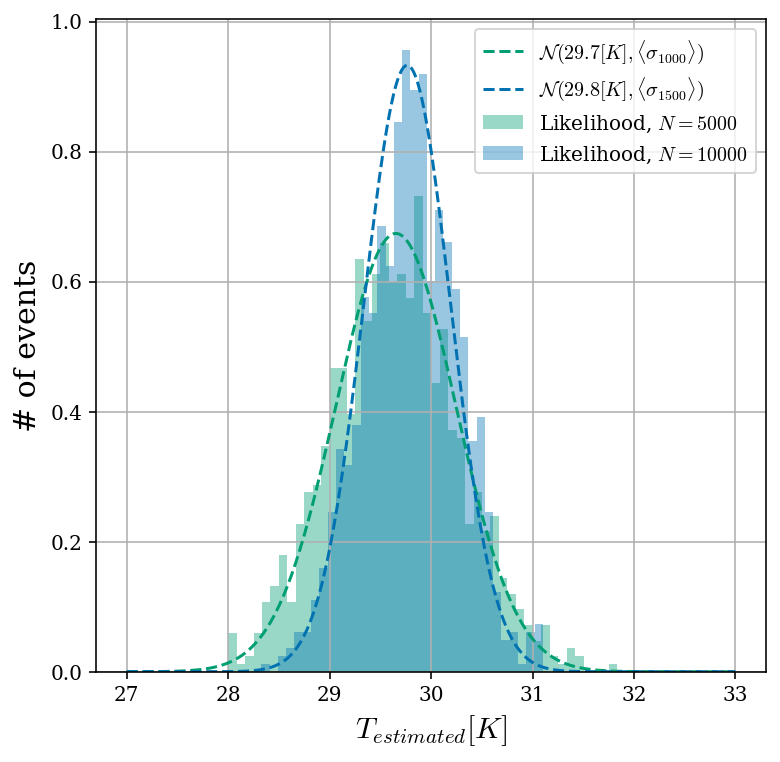

In [451]:
x = np.linspace(27,33,300)
plt.subplots(figsize=(6,6))
nbins = [46, 34]
fit_name=[r"$\mathcal{N}($"+f"${round(np.mean(x2_T_es[0]),1)}[K]$"+r"$,\langle\sigma_{1000}\rangle)$", r"$\mathcal{N}($"+f"${round(np.mean(x2_T_es[1]),1)}[K]$"+r"$,\langle\sigma_{1500}\rangle)$"]
for i in range(len(N)):
    plt.hist(x2_T_es[i], bins = nbins[i], density=True, alpha = 0.4, label='Likelihood, $N=$'+f'${N[i]}$', color = myColors[i])
    y = Gaussian(x,np.mean(x2_T_es[i]),np.mean(x2_errs[i]))
    plt.plot(x,y, "--", label =  fit_name[i], color = myColors[i])

plt.xlabel("$T_{estimated}[K]$")
plt.ylabel("# of events")
plt.legend()
plt.grid()


c. We can also evaluate T with the integrale indeed
$$
E_f= \int_0^{150} e\cdot f(e) de \approx \dfrac{1}{N}\sum_{i=1}^N h(e_i)
$$


In [ ]:
n_exp = 1000
N = 5000

In [ ]:
M_T_es = np.empty(n_exp, dtype=object)
M_err = np.empty(n_exp, dtype=object)

for i in range(n_exp):
    datas = E_generator(N,T)
    MC_est = (1/N)*np.sum(datas)
    MC_var = (1/N)*np.sum(datas**2)-MC_est**2
    MC_std = np.sqrt(MC_var)/np.sqrt(N)
    
    T_est = 2*MC_est
    T_std = 2*MC_std
    M_T_es[i] = T_est
    M_err[i] = T_std

Mean =  30.040934784259836


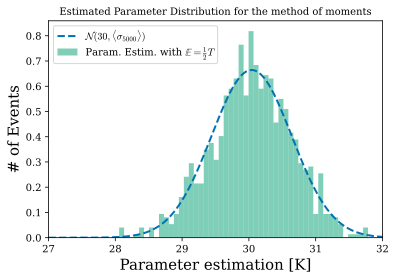

In [ ]:
x = np.linspace(27,32,500)
y = Gaussian(x,np.mean(M_T_es),np.mean(M_err))
plt.subplots(figsize=(6,6))

plt.hist(M_T_es  , bins = 50, density=True, alpha = 0.5, label = "Param. Estim. with "+r"$\mathbb{E}=\frac{1}{2}T$")

plt.plot(x,y, "--", lw = 2, label = r"$\mathcal{N}(30,\langle\sigma_{5000}\rangle)$")
plt.xlim(27,32)

plt.xlabel("Parameter estimation [K]")
plt.ylabel("# of Events")
plt.legend()

plt.grid()

print("Mean = ", np.mean(M_T_es))

d. 

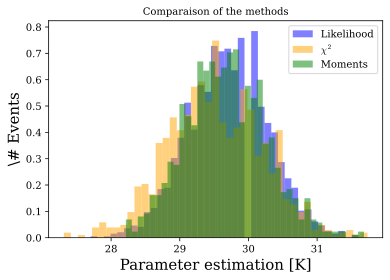

In [ ]:
c1,_,_=plt.hist(L_T_es[1], density=True, alpha=0.5, bins=40, label="Likelihood")
c2,_,_=plt.hist(x2_T_es[1] , density=True, alpha=0.5, bins=43, label=r"$\chi^2$")
c3,_,_=plt.hist(M_T_es , density=True, alpha=0.5, bins=40, label="Moments")
plt.subplots(figsize=(6,6))
plt.xlabel("Parameter estimation [K]")
plt.ylabel("# of Events")
plt.grid()


# plt.xlim(28,31)
plt.legend()

Task - 5


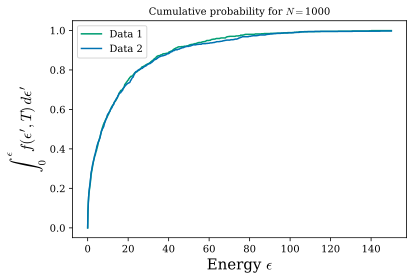

In [ ]:
N=1000

data_1 = np.sort(E_generator(N,T))  #Generate the data and sort it.
data_2 = np.sort(E_generator(N,T))
x = np.linspace(0,150,len(data_1))

plt.subplots(figsize=(6,6))

# Compute the cumulative function using scipy "percentileofscore"
data_1_cum = [stats.percentileofscore(data_1, i)/100 for i in x]
data_2_cum = [stats.percentileofscore(data_2, i)/100 for i in x]
#print('data_2_cum:\n{}'.format(data_2_cum))
#print(20*'-')

plt.plot(x,data_1_cum, label = "Data 1")
plt.plot(x,data_2_cum, label = "Data 2")
plt.xlabel("Energy $\epsilon$")
plt.ylabel("$\int_0^{\epsilon} f(\epsilon',T) \,d\epsilon'$")
plt.legend()
plt.grid()


In [ ]:
data_diff = np.abs(np.subtract(data_1_cum, data_2_cum))
max_diff = np.max(data_diff)

# Trying to use directly the 2-sample Kolmogorov test from scipy.stats:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
# https://stackoverflow.com/questions/39132469/how-to-interpret-scipy-stats-kstest-and-ks-2samp-to-evaluate-fit-of-data-t?rq=1

D_statistics, p_value = stats.ks_2samp(data_1,data_2) #D_statistics is the absolute max distance between the two samples

print("Computed Max Dist\t = "  ,  max_diff
    ,"\nComputed from Libr\t = ", D_statistics)

Computed Max Dist	 =  0.02400000000000002 
Computed from Libr	 =  0.025


In [ ]:
#The different values of \alpha and their c(\alpha)

alpha = [0.20, 0.15, 0.10, 0.05, 0.025, 0.01, 0.005, 0.001]
c_alpha = [1.073, 1.138, 1.224, 1.358, 1.628, 1.731, 1.949]

crit_value = []
for i in range(len(alpha)):
    crit = np.sqrt(-math.log(alpha[i]/2)*1/N)
    crit_value.append(np.round(crit,3))

crit_value2 = []
for i in range(len(c_alpha)):
    crit_value2.append(c_alpha[i] * np.sqrt(2/N))

print(crit_value)
print(crit_value2)

[0.048, 0.051, 0.055, 0.061, 0.066, 0.073, 0.077, 0.087]
[0.04798601879714549, 0.05089290716789521, 0.05473894408919485, 0.060731606268894296, 0.07280637334739315, 0.07741267338104273, 0.0871619297629418]


In [ ]:
index = 3
if D_statistics > crit_value[index]:
    print('The null hypothesis is rejected at the level:\n{}'.format(alpha[index]))
else : 
    print('We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:\n{}'.format(alpha[index]))

We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.05


In [ ]:
# Generalizing for Nexp = 100
N=1000
N_exp = 1e2
i = 1
max_dist =[]
pList = []

while i <= N_exp :     
    data_1 = np.sort(E_generator(N,30))
    data_2 = np.sort(E_generator(N,30))    
    D_stat, p_value = stats.ks_2samp(data_1, data_2)
    max_dist.append(D_stat)    
    pList.append(p_value)
    i = i+1

In [ ]:
# We can compare each of the D_stat value (for each exp) with the 95% confidence level (obtained by using the function we defined before):
# We use the percentileofscore function to see how many (in percentage) are below this value :

print('Crit value for alpha = 0.05 is :\n{}'.format(crit_value[3]))
percentile = stats.percentileofscore(max_dist, crit_value[3])

print('There are', percentile, "% of d <= crit_value : which means that in",percentile , "% of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.")

Crit value for alpha = 0.05 is :
0.061
There are 92.0 % of d <= crit_value : which means that in 92.0 % of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.


Task - 6

In [ ]:
def fisher_information(data, T):
    # Initialize the sum
    sum = 0
    delta = 1e-6 
    N=len(data)
    
    # Loop over the data points
    for e in data:
        # Calculate the derivative using finite differences
        derivative = (np.log(fe(e , T+delta)) - np.log(fe(e, T- delta))) / (2 * delta)
        
        # Add the square of the derivative to the sum
        sum += derivative**2
    
    # Return the Fisher information
    return N * sum

In [ ]:
n_exp = 1000
n_sample = 1000
fi = np.empty(n_exp, dtype = object)
var = np.empty(n_exp, dtype = object)
for i in range(n_exp):
    DataSet = E_generator(n_sample, T)
    var[i] = np.var(DataSet)
    fi[i] = fisher_information(DataSet, T)


4438.578169953366

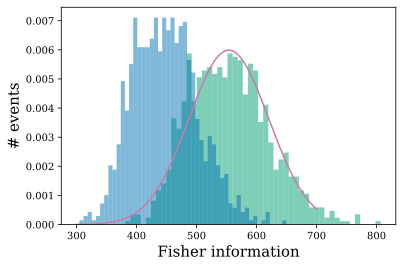

In [ ]:
x = np.linspace(300, 700, 1000)
y = Gaussian(x, np.mean(fi), np.sqrt(np.var(fi)))
plt.subplots(figsize=(6,6))
plt.hist(fi, bins = 50,  density = True, alpha =0.5)
plt.hist(var, bins = 50,  density = True, alpha =0.5)
plt.plot(x, y)
plt.xlabel('Fisher information')
plt.ylabel('# events')
np.var(fi)
plt.grid()